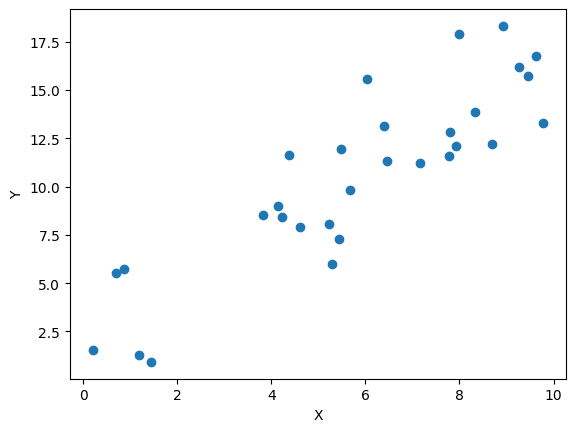

In [1]:
import numpy as np
import matplotlib.pyplot as plt


def cost_function(X, Y, weight, bias):
    n = len(X)
    Y_pred = weight * X + bias
    cost = (1/n) * sum((Y - Y_pred) ** 2)
    return cost

def update_weights(X, Y, weight, bias, learning_rate):
    n = len(X)
    Y_pred = weight * X + bias
    D_weight = (-2/n) * sum(X * (Y - Y_pred))
    D_bias = (-2/n) * sum(Y - Y_pred)
    weight = weight - learning_rate * D_weight
    bias = bias - learning_rate * D_bias
    return weight, bias

def train(X, Y, weight, bias, learning_rate, iters):
    cost_history = [] #this is updated over each iteration. That is called as training

    for i in range(iters):
        weight, bias = update_weights(X, Y, weight, bias, learning_rate)

        # Calculate cost for auditing purposes
        cost = cost_function(X, Y, weight, bias)
        cost_history.append(cost)

        # Log Progress
        if i % 10 == 0:
            print("iter={:d}    weight={:.2f}    bias={:.4f}    cost={:.2}".format(i, weight, bias, cost))

    return weight, bias, cost_history

np.random.seed(0)
X = np.random.rand(30) * 10

# Generate the dependent variable (target) using a linear equation
Y = 2 + 1.5 * X + np.random.randn(30) * 2

plt.scatter(X, Y)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

iter=0    weight=0.00    bias=0.0002    cost=1.3e+02
iter=10    weight=0.02    bias=0.0023    cost=1.3e+02
iter=20    weight=0.03    bias=0.0044    cost=1.3e+02
iter=30    weight=0.04    bias=0.0064    cost=1.3e+02
iter=40    weight=0.06    bias=0.0085    cost=1.2e+02
iter=50    weight=0.07    bias=0.0105    cost=1.2e+02
iter=60    weight=0.09    bias=0.0125    cost=1.2e+02
iter=70    weight=0.10    bias=0.0145    cost=1.2e+02
iter=80    weight=0.11    bias=0.0165    cost=1.2e+02
iter=90    weight=0.13    bias=0.0185    cost=1.1e+02
iter=100    weight=0.14    bias=0.0204    cost=1.1e+02
iter=110    weight=0.15    bias=0.0223    cost=1.1e+02
iter=120    weight=0.17    bias=0.0242    cost=1.1e+02
iter=130    weight=0.18    bias=0.0261    cost=1.1e+02
iter=140    weight=0.19    bias=0.0280    cost=1.1e+02
iter=150    weight=0.21    bias=0.0299    cost=1e+02
iter=160    weight=0.22    bias=0.0317    cost=1e+02
iter=170    weight=0.23    bias=0.0336    cost=1e+02
iter=180    weight=0.24    

<ipython-input-1-7d1f8329416a>:8: RuntimeWarning: overflow encountered in square
  cost = (1/n) * sum((Y - Y_pred) ** 2)
<ipython-input-1-7d1f8329416a>:14: RuntimeWarning: overflow encountered in double_scalars
  D_weight = (-2/n) * sum(X * (Y - Y_pred))
<ipython-input-1-7d1f8329416a>:16: RuntimeWarning: invalid value encountered in double_scalars
  weight = weight - learning_rate * D_weight
/usr/local/lib/python3.10/dist-packages/matplotlib/scale.py:253: RuntimeWarning: overflow encountered in power
  return np.power(self.base, a)
<ipython-input-2-7ee23443a834>:24: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(bottom=0, top=150)


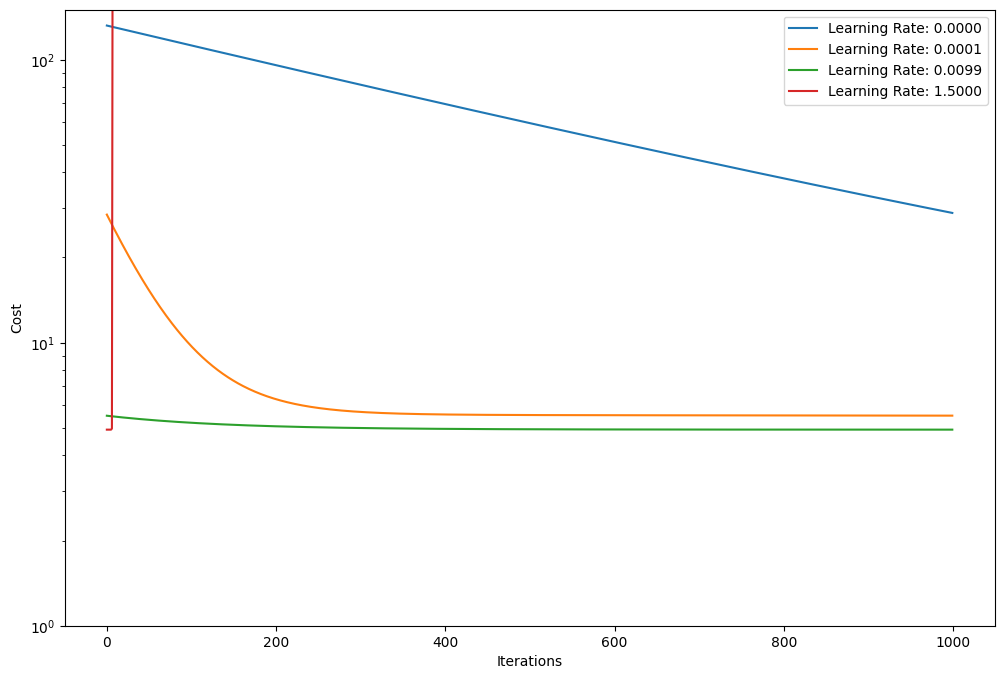

In [2]:
# Initialize weight and bias
weight = 0
bias = 0

# Set hyperparameters 
#for learning rates  (low, good, high, very high)
learning_rates = [0.00001,0.0001, 0.0099,1.5]
iters = 1000

# Train the model for different learning rates
plt.figure(figsize=(12, 8))
for learning_rate in learning_rates:
    # Train the model
    weight, bias, cost_history = train(X, Y, weight, bias, learning_rate, iters)
    
    # Plot cost history
    iterations = range(len(cost_history))
    plt.plot(iterations, cost_history, label='Learning Rate: {:.4f}'.format(learning_rate))



# Adjust y-axis scale to logarithmic, otherwise we can't see the plots clearly
plt.yscale('log')
plt.ylim(bottom=0, top=150)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.legend()
plt.show()

iter=0    weight=0.15    bias=0.0210    cost=1.1e+02
iter=0    weight=0.15    bias=0.0210    cost=1.1e+02
iter=0    weight=0.15    bias=0.0210    cost=1.1e+02
iter=10    weight=1.06    bias=0.1569    cost=2.4e+01
iter=20    weight=1.44    bias=0.2169    cost=8.6
iter=30    weight=1.60    bias=0.2456    cost=6.1
iter=40    weight=1.66    bias=0.2614    cost=5.6
iter=0    weight=0.15    bias=0.0210    cost=1.1e+02
iter=10    weight=1.06    bias=0.1569    cost=2.4e+01
iter=20    weight=1.44    bias=0.2169    cost=8.6
iter=30    weight=1.60    bias=0.2456    cost=6.1
iter=40    weight=1.66    bias=0.2614    cost=5.6
iter=50    weight=1.69    bias=0.2718    cost=5.6
iter=60    weight=1.70    bias=0.2800    cost=5.5
iter=70    weight=1.70    bias=0.2873    cost=5.5
iter=80    weight=1.70    bias=0.2943    cost=5.5
iter=90    weight=1.70    bias=0.3010    cost=5.5
iter=100    weight=1.70    bias=0.3076    cost=5.5
iter=110    weight=1.70    bias=0.3142    cost=5.5
iter=120    weight=1.70    b

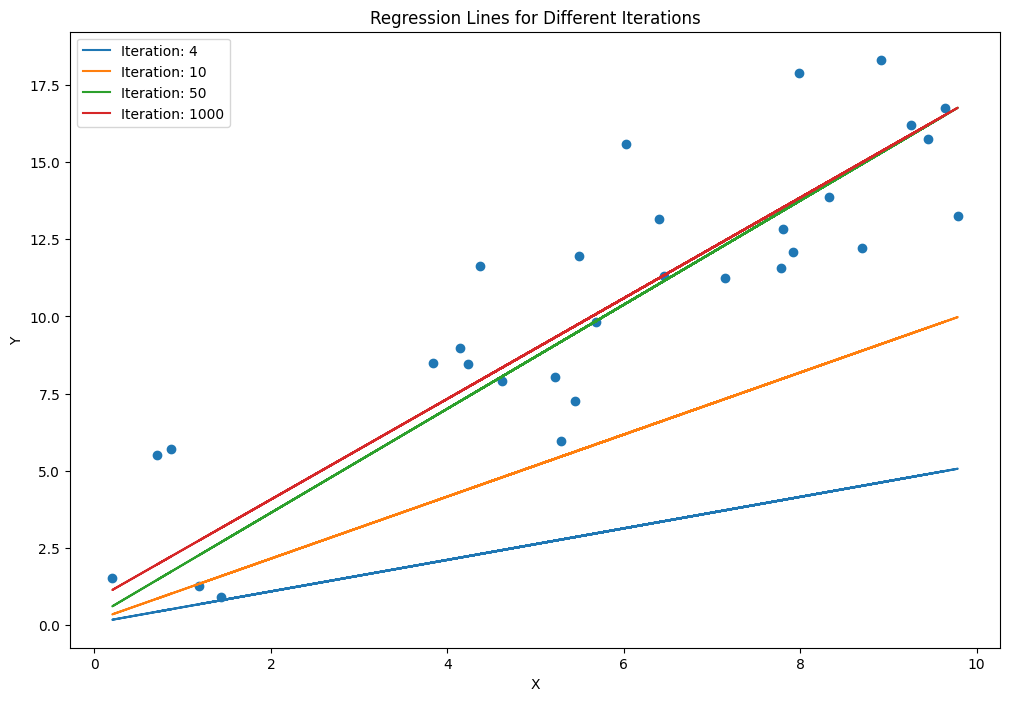

In [3]:
# Plot regression lines for different iterations
plt.figure(figsize=(12, 8))
iterations = [4, 10, 50, 1000]
for iteration in iterations:
    weight, bias, _ = train(X, Y, 0, 0, 0.001, iteration)
    Y_pred = weight * X + bias
    plt.plot(X, Y_pred, label='Iteration: {}'.format(iteration))

plt.scatter(X, Y)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Regression Lines for Different Iterations')
plt.legend()
plt.show()
